In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('MortalityDataset.csv') # Loading the dataset

In [2]:
data.head()

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
0,20,176,77,195,nonsmo,b,alive
1,53,167,56,250,sigare,o,dead
2,44,170,80,304,sigare,a,dead
3,37,173,89,178,nonsmo,o,alive
4,26,170,71,206,sigare,o,alive


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AGE     200 non-null    int64 
 1   HEIGHT  200 non-null    int64 
 2   WEIGHT  200 non-null    int64 
 3   CHOL    200 non-null    int64 
 4   SMOKE   200 non-null    object
 5   BLOOD   200 non-null    object
 6   MORT    200 non-null    object
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


1) **3D Scatterplot** for the variables - **height**, **weight**, and **mortality**

In [69]:
filtered_data = data[data['MORT'].isin(['alive', 'dead'])]
alive_data = filtered_data[filtered_data['MORT'] == 'alive']
dead_data = filtered_data[filtered_data['MORT'] == 'dead']

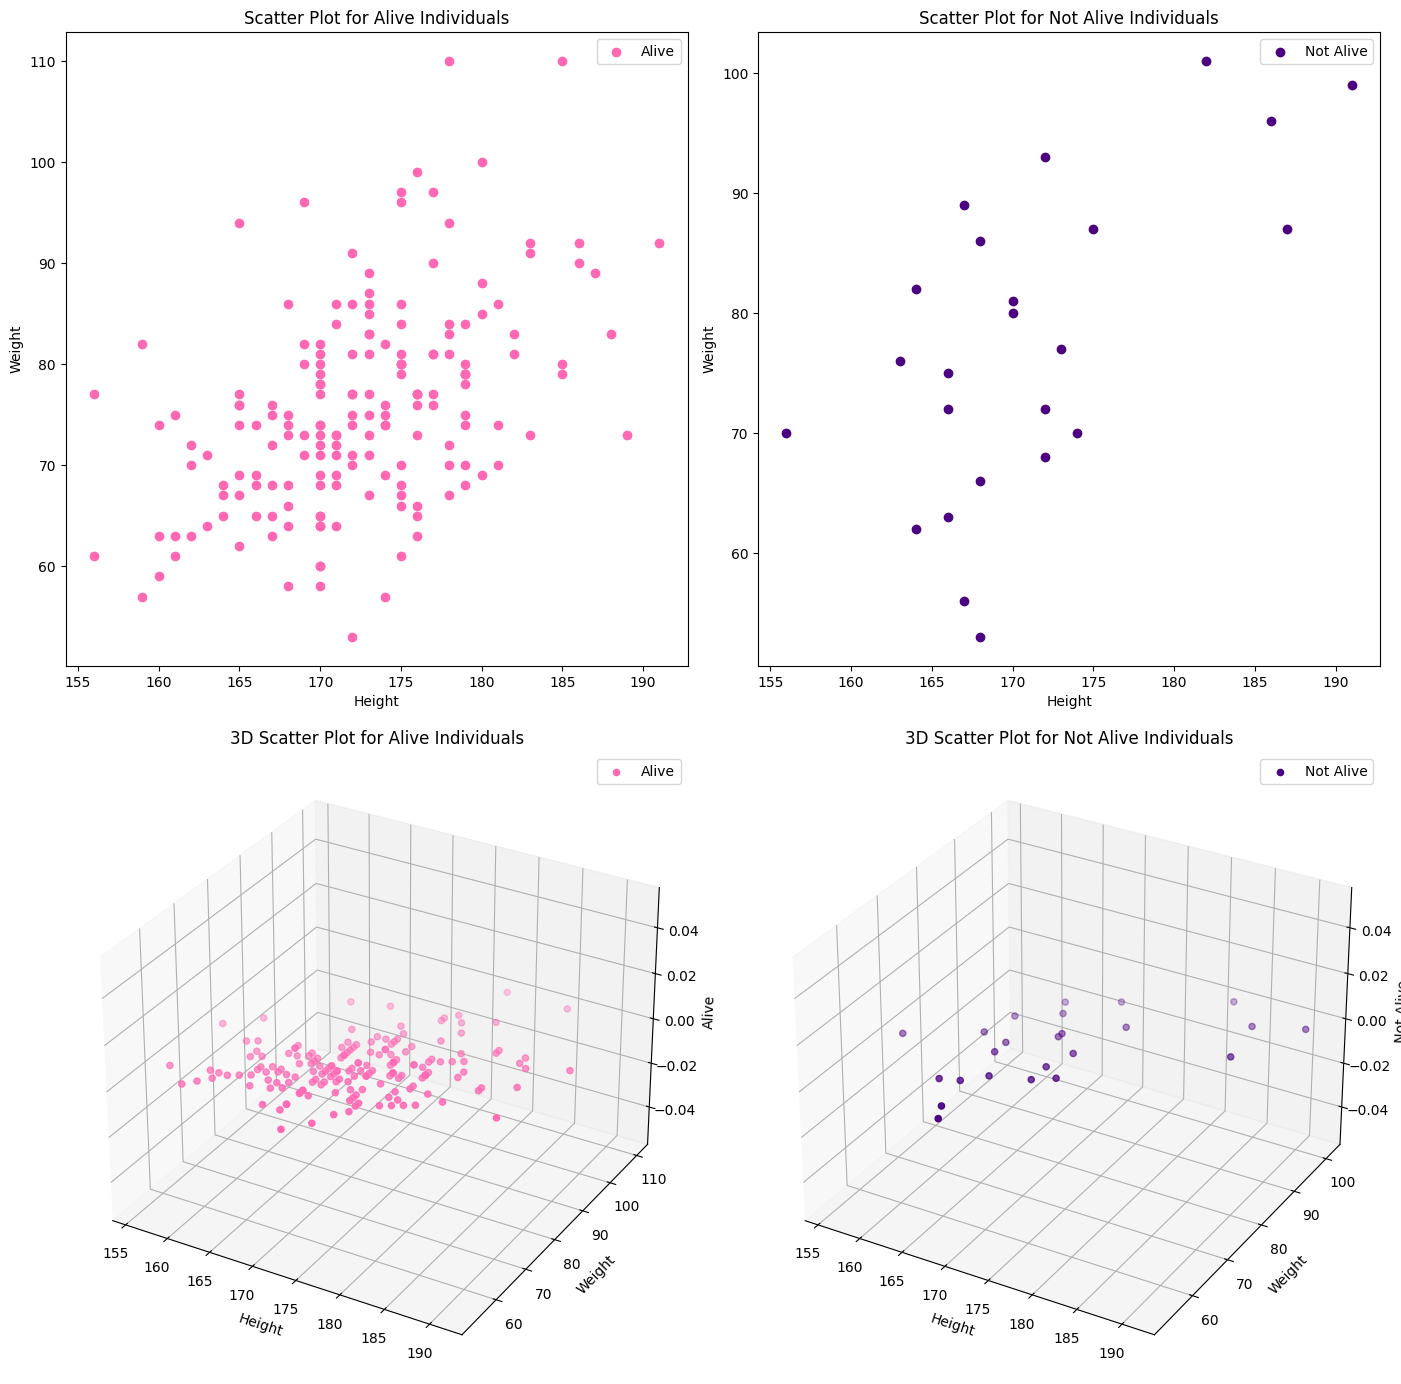

In [60]:
fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(221)
ax1.scatter(alive_data['HEIGHT'], alive_data['WEIGHT'], color='hotpink', label='Alive')
ax1.set_title('Scatter Plot for Alive Individuals')
ax1.set_xlabel('Height')
ax1.set_ylabel('Weight')
ax1.legend()

ax2 = fig.add_subplot(222)
ax2.scatter(dead_data['HEIGHT'], dead_data['WEIGHT'], color='indigo', label='Not Alive')
ax2.set_title('Scatter Plot for Not Alive Individuals')
ax2.set_xlabel('Height')
ax2.set_ylabel('Weight')
ax2.legend()

ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(alive_data['HEIGHT'], alive_data['WEIGHT'], zs=0, c='hotpink', label='Alive')
ax3.set_title('3D Scatter Plot for Alive Individuals')
ax3.set_xlabel('Height')
ax3.set_ylabel('Weight')
ax3.set_zlabel('Alive')
ax3.legend()

ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(dead_data['HEIGHT'], dead_data['WEIGHT'], zs=0, c='indigo', label='Not Alive')
ax4.set_title('3D Scatter Plot for Not Alive Individuals')
ax4.set_xlabel('Height')
ax4.set_ylabel('Weight')
ax4.set_zlabel('Not Alive')
ax4.legend()

plt.tight_layout()
plt.show()

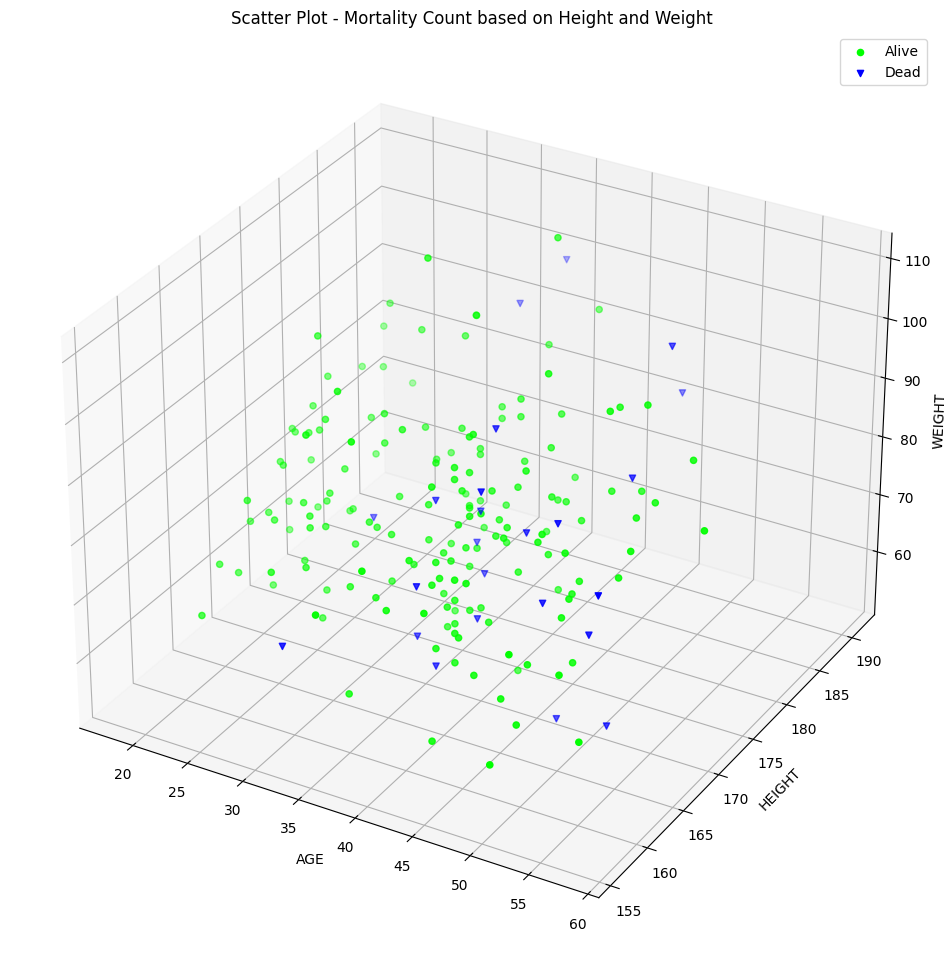

In [70]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Extracting relevant columns
age = data['AGE']
height = data['HEIGHT']
weight = data['WEIGHT']
mortality = data['MORT']

# Scatter plot for 'alive' entries
ax.scatter(age[mortality == 'alive'], height[mortality == 'alive'], weight[mortality == 'alive'], color='lime', marker='o', label='Alive')

# Scatter plot for 'dead' entries
ax.scatter(age[mortality == 'dead'], height[mortality == 'dead'], weight[mortality == 'dead'], color='blue', marker='v', label='Dead')

ax.set_xlabel('AGE')
ax.set_ylabel('HEIGHT')
ax.set_zlabel('WEIGHT')
ax.set_title('Scatter Plot - Mortality Count based on Height and Weight')
ax.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


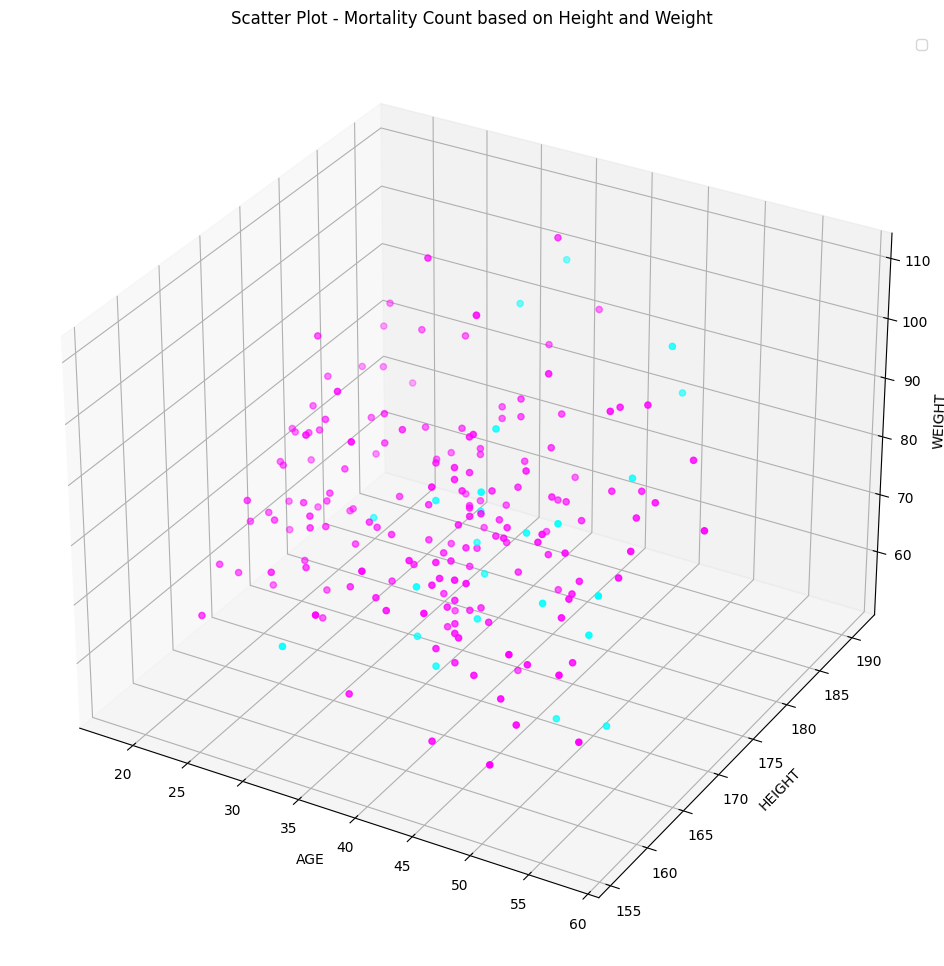

In [61]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using matplotlib for 3D and seaborn for color mapping
scatter = ax.scatter(data['AGE'], data['HEIGHT'], data['WEIGHT'], c=data['MORT'].map({'alive': 'magenta', 'dead': 'cyan'}))

ax.set_xlabel('AGE')
ax.set_ylabel('HEIGHT')
ax.set_zlabel('WEIGHT')
ax.set_title('Scatter Plot - Mortality Count based on Height and Weight')
ax.legend(handles=scatter.legend_elements()[0], labels=['Alive', 'Dead'])

plt.show()

2) **3D Bar Plot** for the variables - **chol**, **blood**, and **age**


[34.76829268292683, 37.2, 38.18181818181818, 35.89010989010989]
[230.6829268292683, 248.4, 236.6818181818182, 234.67032967032966]


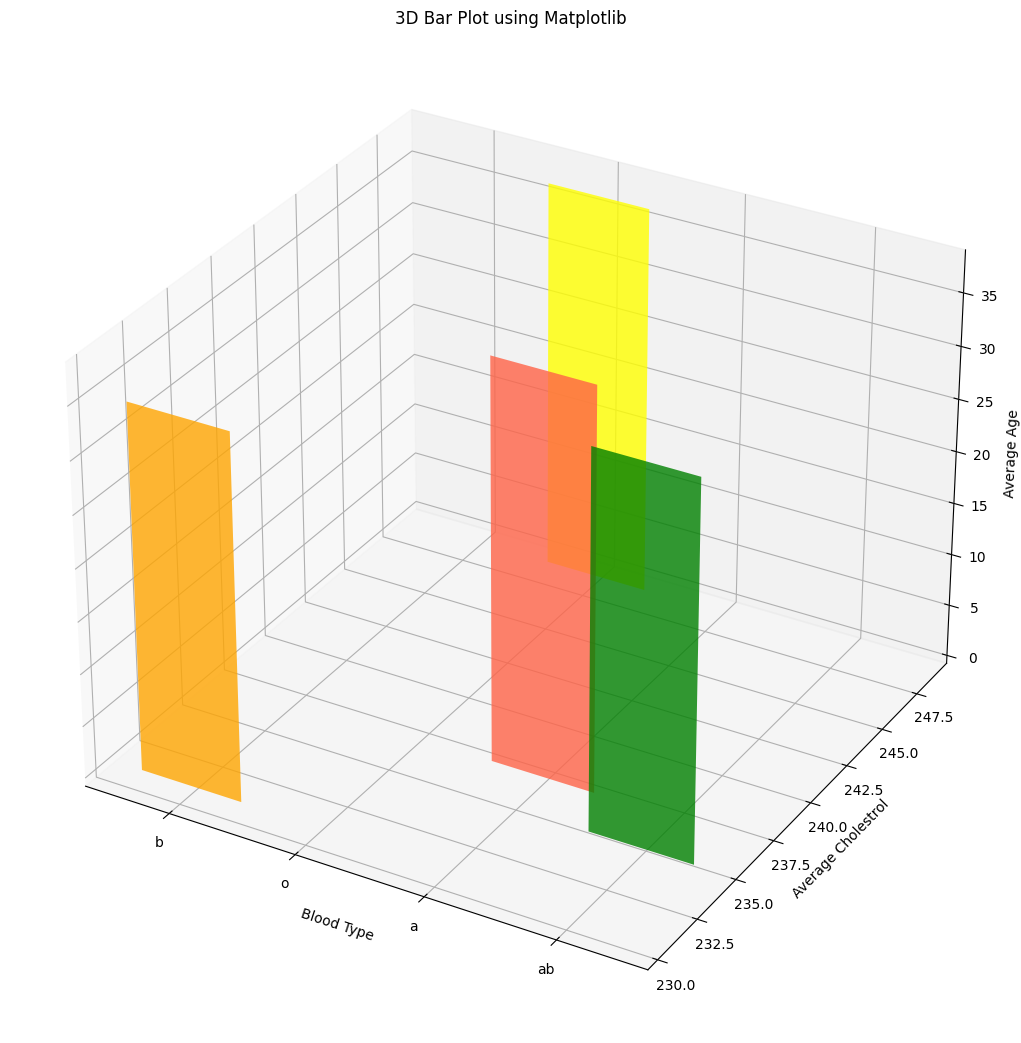

In [40]:
# Creating a 3D bar plot with Matplotlib
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')

types = list(data['BLOOD'].unique())
average_age = list(data.groupby('BLOOD')['AGE'].mean())
print(average_age)
average_chol = list(data.groupby('BLOOD')['CHOL'].mean())
print(average_chol)

ax.bar(types, average_age, average_chol, color = ['orange','yellow','tomato','green'], zdir='y', alpha=0.8)

ax.set_xlabel('Blood Type')
ax.set_ylabel('Average Cholestrol')
ax.set_zlabel('Average Age')
ax.set_title('3D Bar Plot using Matplotlib')

plt.show()

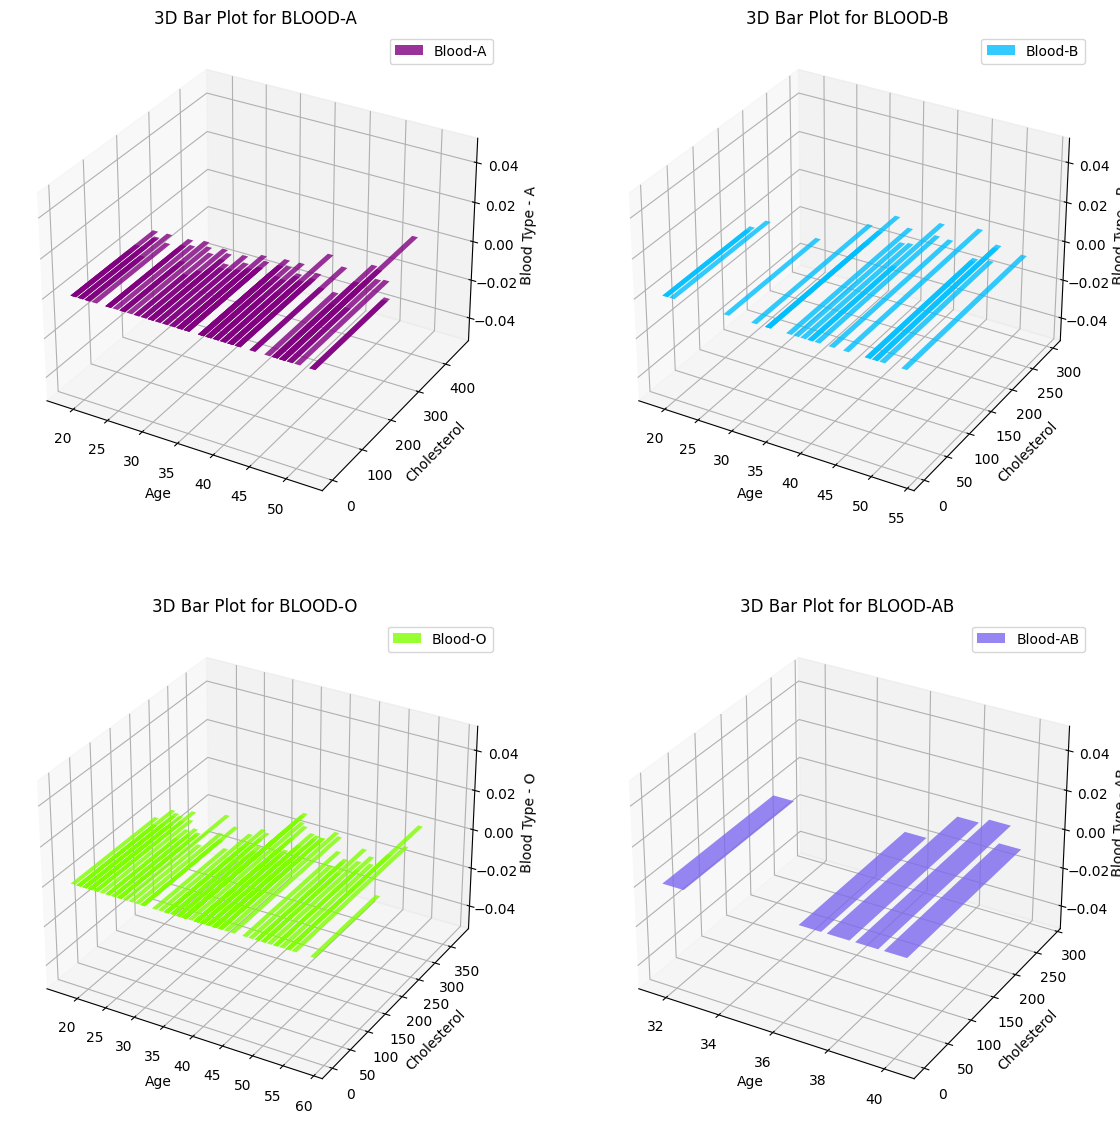

In [66]:
fig = plt.figure(figsize=(14,14))

blood_data = data[data['BLOOD'].isin(['a', 'b', 'o', 'ab'])]
blood_a = blood_data[blood_data['BLOOD'] == 'a']
blood_b = blood_data[blood_data['BLOOD'] == 'b']
blood_o = blood_data[blood_data['BLOOD'] == 'o']
blood_ab = blood_data[blood_data['BLOOD'] == 'ab']

ax1 = fig.add_subplot(221, projection='3d')
ax1.bar(blood_a['AGE'], blood_a['CHOL'], color='purple', zdir='z', alpha=0.8, label='Blood-A')
ax1.set_title('3D Bar Plot for BLOOD-A')
ax1.set_xlabel('Age')
ax1.set_ylabel('Cholesterol')
ax1.set_zlabel('Blood Type - A')
ax1.legend()

ax2 = fig.add_subplot(222, projection='3d')
ax2.bar(blood_b['AGE'], blood_b['CHOL'], color='deepskyblue', zdir='z', alpha=0.8, label='Blood-B')
ax2.set_title('3D Bar Plot for BLOOD-B')
ax2.set_xlabel('Age')
ax2.set_ylabel('Cholesterol')
ax2.set_zlabel('Blood Type - B')
ax2.legend()

ax3 = fig.add_subplot(223, projection='3d')
ax3.bar(blood_o['AGE'], blood_o['CHOL'], color='chartreuse', zdir='z', alpha=0.8, label='Blood-O')
ax3.set_title('3D Bar Plot for BLOOD-O')
ax3.set_xlabel('Age')
ax3.set_ylabel('Cholesterol')
ax3.set_zlabel('Blood Type - O')
ax3.legend()

ax4 = fig.add_subplot(224, projection='3d')
ax4.bar(blood_ab['AGE'], blood_ab['CHOL'], color='mediumslateblue', zdir='z', alpha=0.8, label='Blood-AB')
ax4.set_title('3D Bar Plot for BLOOD-AB')
ax4.set_xlabel('Age')
ax4.set_ylabel('Cholesterol')
ax4.set_zlabel('Blood Type - AB')
ax4.legend()

plt.show()

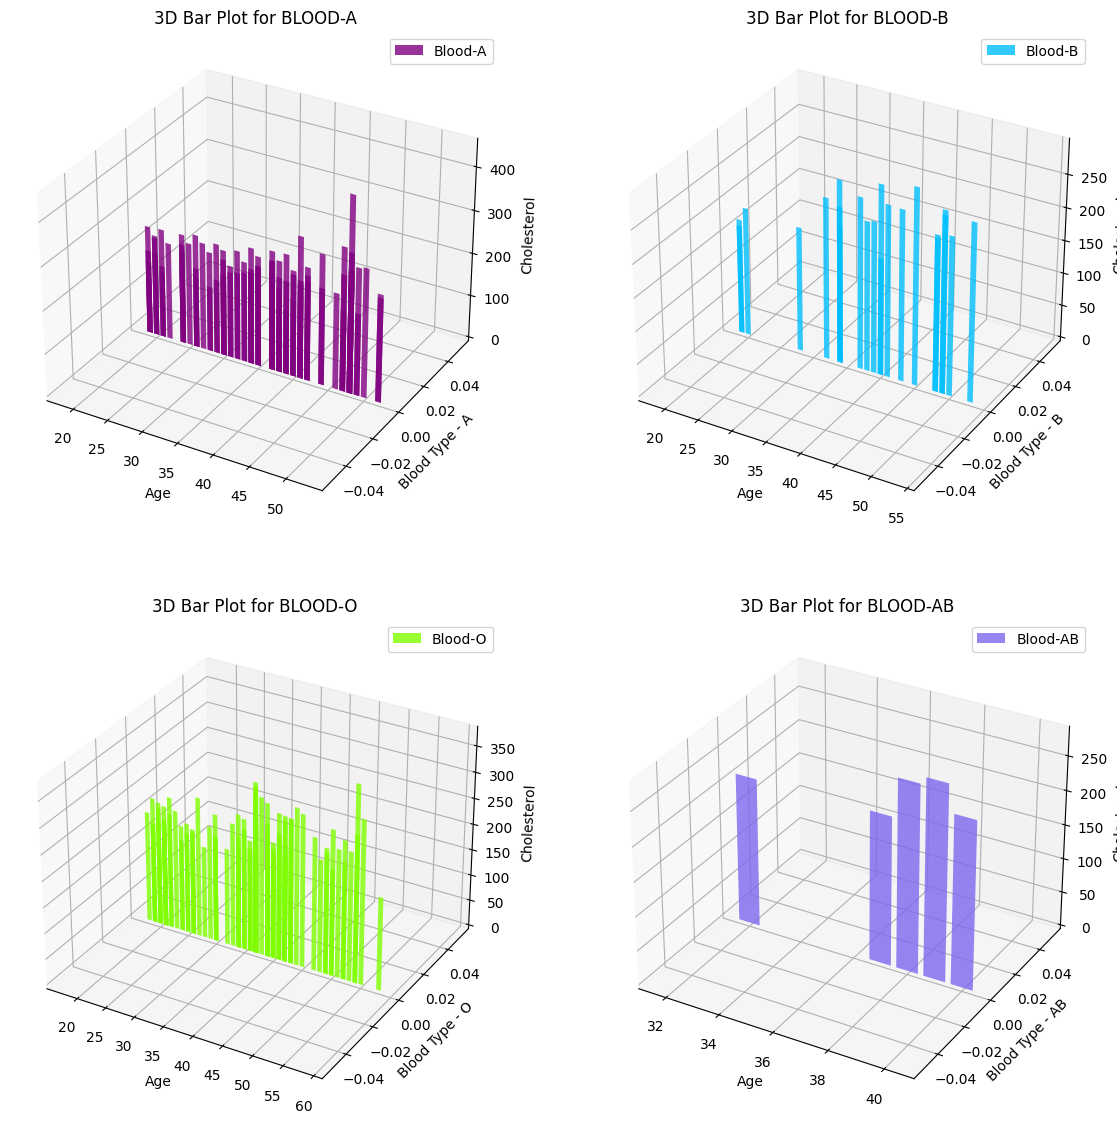

In [67]:
fig = plt.figure(figsize=(14,14))

blood_data = data[data['BLOOD'].isin(['a', 'b', 'o', 'ab'])]
blood_a = blood_data[blood_data['BLOOD'] == 'a']
blood_b = blood_data[blood_data['BLOOD'] == 'b']
blood_o = blood_data[blood_data['BLOOD'] == 'o']
blood_ab = blood_data[blood_data['BLOOD'] == 'ab']

ax1 = fig.add_subplot(221, projection='3d')
ax1.bar(blood_a['AGE'], blood_a['CHOL'], color='purple', zdir='y', alpha=0.8, label='Blood-A')
ax1.set_title('3D Bar Plot for BLOOD-A')
ax1.set_xlabel('Age')
ax1.set_zlabel('Cholesterol')
ax1.set_ylabel('Blood Type - A')
ax1.legend()

ax2 = fig.add_subplot(222, projection='3d')
ax2.bar(blood_b['AGE'], blood_b['CHOL'], color='deepskyblue', zdir='y', alpha=0.8, label='Blood-B')
ax2.set_title('3D Bar Plot for BLOOD-B')
ax2.set_xlabel('Age')
ax2.set_zlabel('Cholesterol')
ax2.set_ylabel('Blood Type - B')
ax2.legend()

ax3 = fig.add_subplot(223, projection='3d')
ax3.bar(blood_o['AGE'], blood_o['CHOL'], color='chartreuse', zdir='y', alpha=0.8, label='Blood-O')
ax3.set_title('3D Bar Plot for BLOOD-O')
ax3.set_xlabel('Age')
ax3.set_zlabel('Cholesterol')
ax3.set_ylabel('Blood Type - O')
ax3.legend()

ax4 = fig.add_subplot(224, projection='3d')
ax4.bar(blood_ab['AGE'], blood_ab['CHOL'], color='mediumslateblue', zdir='y', alpha=0.8, label='Blood-AB')
ax4.set_title('3D Bar Plot for BLOOD-AB')
ax4.set_xlabel('Age')
ax4.set_zlabel('Cholesterol')
ax4.set_ylabel('Blood Type - AB')
ax4.legend()

plt.show()